In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
df_anger = pd.read_csv("ranked_tweets_by_group/anger.csv")
df_antic = pd.read_csv("ranked_tweets_by_group/anticipation.csv")
df_disgust = pd.read_csv("ranked_tweets_by_group/disgust.csv")
df_fear = pd.read_csv("ranked_tweets_by_group/fear.csv")
df_joy = pd.read_csv("ranked_tweets_by_group/joy.csv")
df_love = pd.read_csv("ranked_tweets_by_group/love.csv")
df_optimism = pd.read_csv("ranked_tweets_by_group/optimism.csv")
df_pessimism = pd.read_csv("ranked_tweets_by_group/pessimism.csv")
df_sad = pd.read_csv("ranked_tweets_by_group/sadness.csv")
df_surprise = pd.read_csv("ranked_tweets_by_group/surprise.csv")
df_trust = pd.read_csv("ranked_tweets_by_group/trust.csv")

In [3]:
nrows = df_anger.shape[0]
val = round(0.5*nrows)
df_anger = df_anger[:val]

nrows = df_antic.shape[0]
val = round(0.5*nrows)
df_antic = df_antic[:val]

nrows = df_disgust.shape[0]
val = round(0.5*nrows)
df_disgust = df_disgust[:val]

nrows = df_fear.shape[0]
val = round(0.5*nrows)
df_fear = df_fear[:val]

nrows = df_love.shape[0]
val = round(0.5*nrows)
df_love = df_love[:val]

nrows = df_joy.shape[0]
val = round(0.5*nrows)
df_joy = df_joy[:val]

nrows = df_optimism.shape[0]
val = round(0.5*nrows)
df_optimism = df_optimism[:val]

nrows = df_pessimism.shape[0]
val = round(0.5*nrows)
df_pessimism = df_pessimism[:val]

nrows = df_sad.shape[0]
val = round(0.5*nrows)
df_sad = df_sad[:val]

nrows = df_surprise.shape[0]
val = round(0.5*nrows)
df_surprise = df_surprise[:val]

nrows = df_trust.shape[0]
val = round(0.5*nrows)
df_trust = df_trust[:val]

In [4]:
print(df_anger.shape)
print(df_antic.shape)
print(df_disgust.shape)
print(df_fear.shape)
print(df_joy.shape)
print(df_love.shape)
print(df_optimism.shape)
print(df_pessimism.shape)
print(df_sad.shape)
print(df_surprise.shape)
print(df_trust.shape)

(1272, 2)
(489, 2)
(1301, 2)
(620, 2)
(1238, 2)
(350, 2)
(992, 2)
(398, 2)
(1004, 2)
(180, 2)
(178, 2)


In [5]:
anger = df_anger.Tweet
antic = df_antic.Tweet
disgust = df_disgust.Tweet
fear = df_fear.Tweet
joy = df_joy.Tweet
love = df_love.Tweet
optimism = df_optimism.Tweet
pessimism = df_pessimism.Tweet
sad = df_sad.Tweet
surprise = df_surprise.Tweet
trust = df_trust.Tweet

## Word-emotion associations

1. Process text to lowercase, remove punctuation and stopwords.
2. Create dictionary with tokens for each emotion and unique tokens for each emotion.

In [6]:
from nltk import tokenize
from nltk.corpus import stopwords

In [7]:
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

In [8]:
def tokenize_text(text):
    tzer = tokenize.RegexpTokenizer(r'[A-Za-z0-9_]+')
    tokenized = tzer.tokenize(text)
    return ' '.join(tokenized)

def stopwords_remove(text):
    words = tokenize.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [9]:
def process_text(tweets):
    tweets = tweets.str.lower()
    tweets = tweets.apply(tokenize_text)
    tweets = tweets.apply(stopwords_remove)
    return tweets

In [10]:
anger = process_text(anger)
antic = process_text(antic)
disgust = process_text(disgust)
fear = process_text(fear)
joy = process_text(joy)
love = process_text(love)
optimism = process_text(optimism)
pessimism = process_text(pessimism)
sad = process_text(sad)
surprise = process_text(surprise)
trust = process_text(trust)

In [11]:
tokens = {'anger': [],
         'antic':[],
         'disgust':[],
         'fear':[],
         'joy':[],
         'love':[],
         'optimism':[],
         'pessimism':[],
         'sad':[],
         'surprise':[],
         'trust':[]}
for item in anger:
    tok = tokenize.word_tokenize(item)
    tokens['anger'].extend(tok)
for item in antic:
    tok = tokenize.word_tokenize(item)
    tokens['antic'].extend(tok)
for item in disgust:
    tok = tokenize.word_tokenize(item)
    tokens['disgust'].extend(tok)
for item in fear:
    tok = tokenize.word_tokenize(item)
    tokens['fear'].extend(tok)
for item in joy:
    tok = tokenize.word_tokenize(item)
    tokens['joy'].extend(tok)
for item in love:
    tok = tokenize.word_tokenize(item)
    tokens['love'].extend(tok)
for item in optimism:
    tok = tokenize.word_tokenize(item)
    tokens['optimism'].extend(tok)
for item in pessimism:
    tok = tokenize.word_tokenize(item)
    tokens['pessimism'].extend(tok)
for item in sad:
    tok = tokenize.word_tokenize(item)
    tokens['sad'].extend(tok)
for item in surprise:
    tok = tokenize.word_tokenize(item)
    tokens['surprise'].extend(tok)
for item in trust:
    tok = tokenize.word_tokenize(item)
    tokens['trust'].extend(tok)

In [12]:
unique_tokens = {'anger': [],
         'antic':[],
         'disgust':[],
         'fear':[],
         'joy':[],
         'love':[],
         'optimism':[],
         'pessimism':[],
         'sad':[],
         'surprise':[],
         'trust':[]}
for key in tokens:
    unique_tokens[key] = list(set(tokens[key]))

In [13]:
print(len(tokens['anger']))
print(len(unique_tokens['anger']))

13110
4075


In [14]:
import pickle
with open('lexicon/emotion_tokens_summary_new.pickle', 'wb') as file1:
    pickle.dump(tokens, file1)
with open('lexicon/emotion_unique_tokens_summary_new.pickle', 'wb') as file2:
    pickle.dump(unique_tokens, file2)

#### A. Word frequenies for each emotion with term frequency charts

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()

In [16]:
tweets = []
tweets.extend(anger)
tweets.extend(antic)
tweets.extend(disgust)
tweets.extend(fear)
tweets.extend(joy)
tweets.extend(love)
tweets.extend(optimism)
tweets.extend(pessimism)
tweets.extend(sad)
tweets.extend(surprise)
tweets.extend(trust)
print(len(tweets))

8022


In [17]:
tweets = set(tweets)
len(tweets)

3562

In [18]:
cvec.fit(tweets)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
len(cvec.get_feature_names())

7846

In [20]:
doc_matrix = {}
doc_matrix['anger'] = cvec.transform(df_anger.Tweet)
doc_matrix['anticipation'] = cvec.transform(df_antic.Tweet)
doc_matrix['disgust'] = cvec.transform(df_disgust.Tweet)
doc_matrix['fear'] = cvec.transform(df_fear.Tweet)
doc_matrix['joy'] = cvec.transform(df_joy.Tweet)
doc_matrix['love'] = cvec.transform(df_love.Tweet)
doc_matrix['optimism'] = cvec.transform(df_optimism.Tweet)
doc_matrix['pessimism'] = cvec.transform(df_pessimism.Tweet)
doc_matrix['sadness'] = cvec.transform(df_sad.Tweet)
doc_matrix['surprise'] = cvec.transform(df_surprise.Tweet)
doc_matrix['trust'] = cvec.transform(df_trust.Tweet)

In [21]:
tf = {}
emotion = {}
for key in doc_matrix:
    tf[key] = np.sum(doc_matrix[key],axis=0)
    emotion[key] = np.squeeze(np.asarray(tf[key]))
term_freq_df = pd.DataFrame([emotion[t] for t in doc_matrix],columns=cvec.get_feature_names()).transpose()
term_freq_df.columns = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

In [22]:
term_freq_df.to_csv('lexicon/term_freq_df_summary.csv',encoding='utf-8')

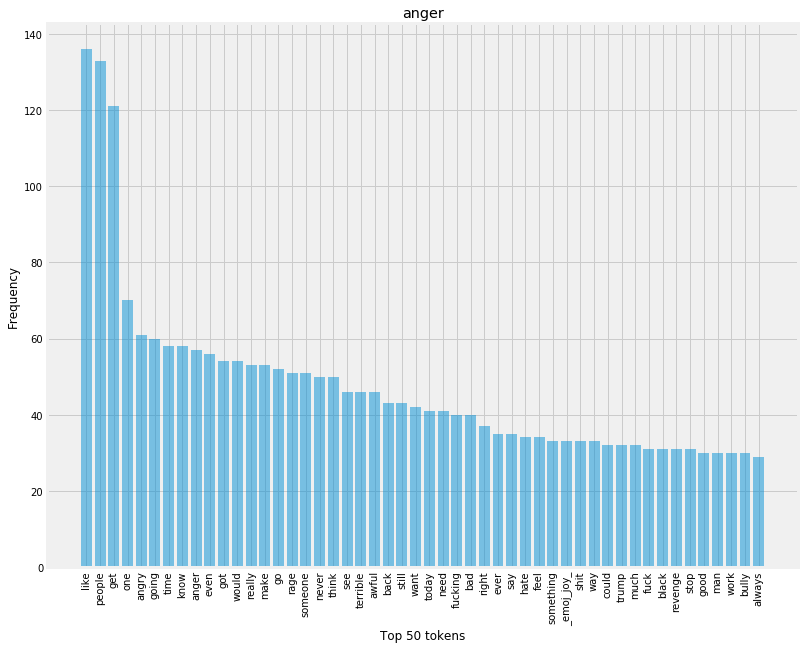

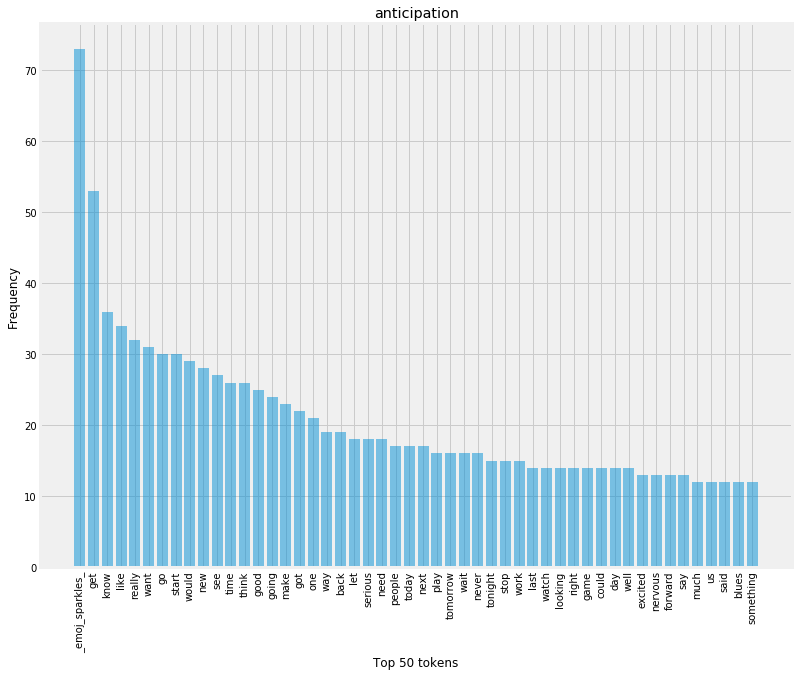

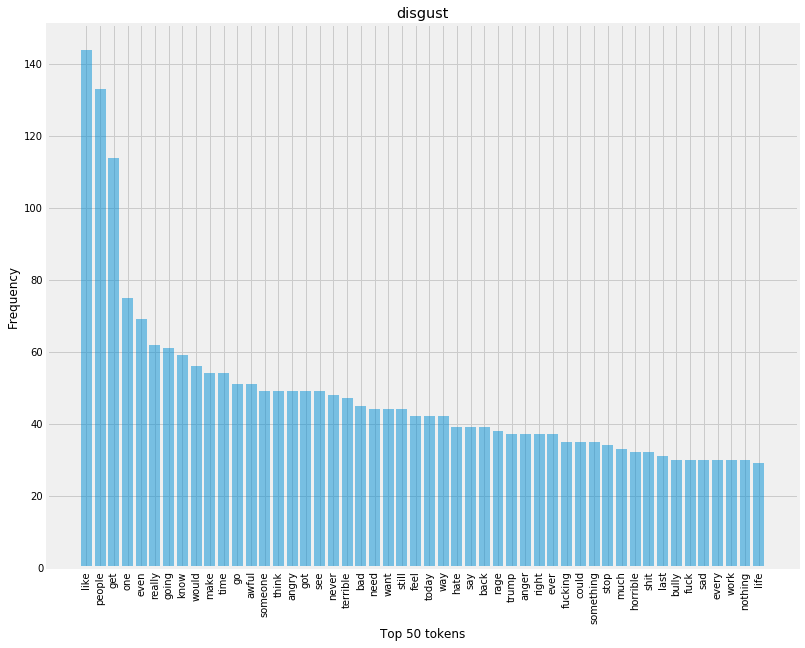

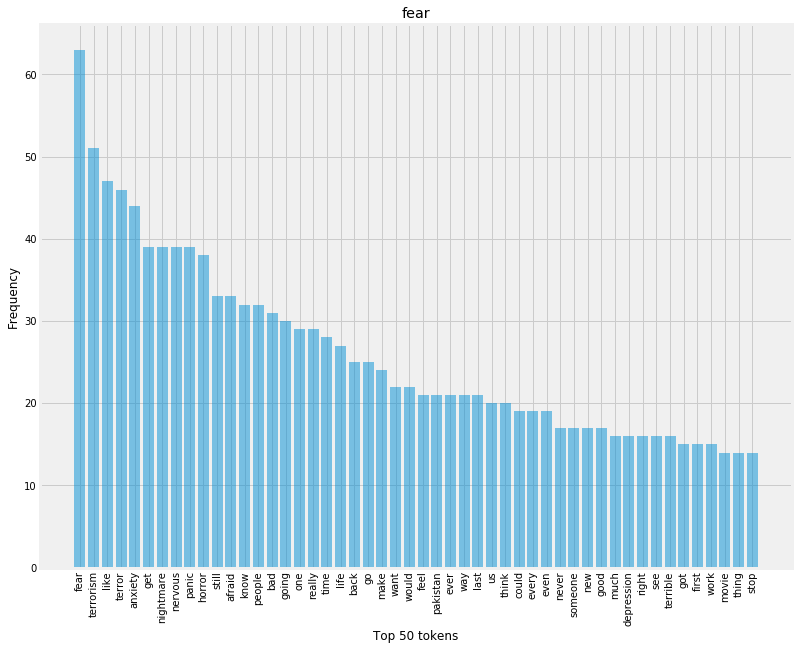

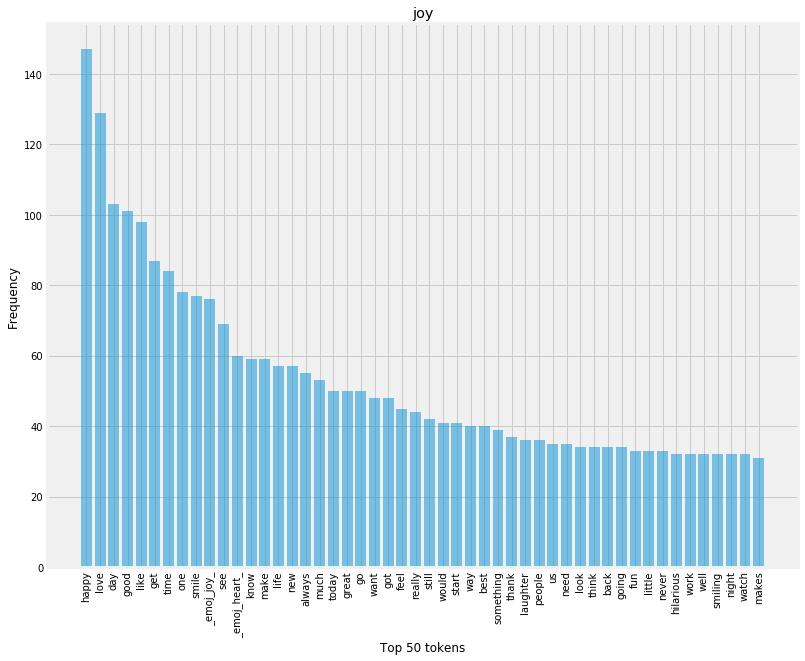

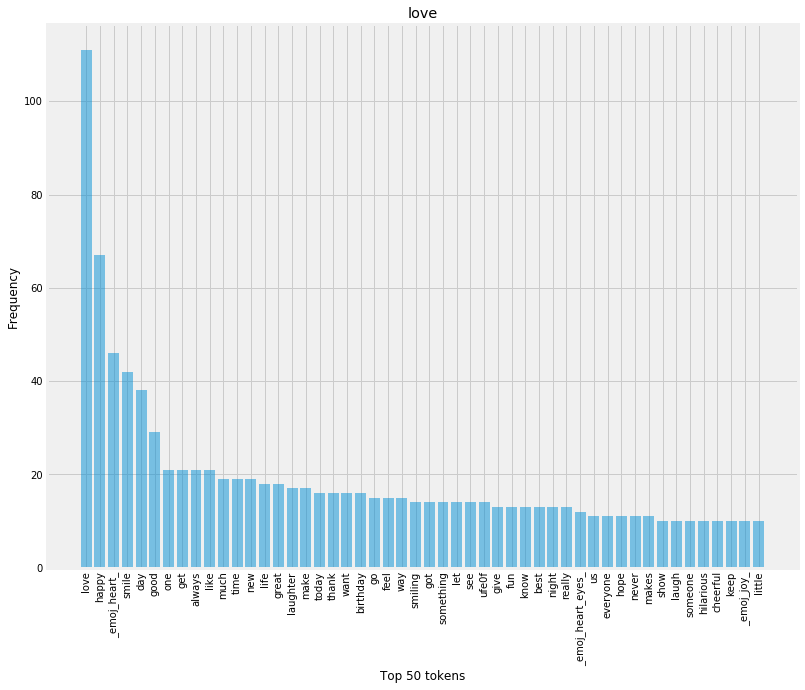

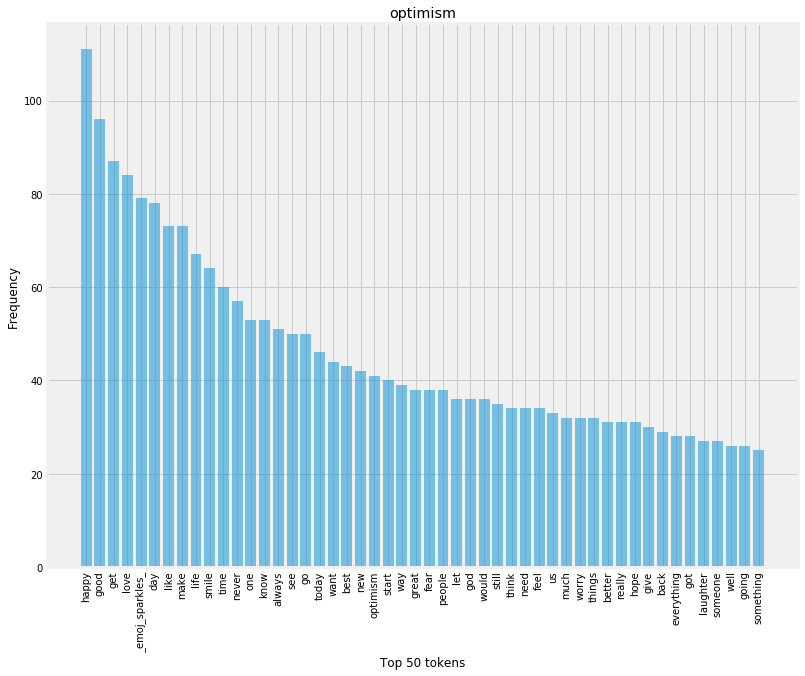

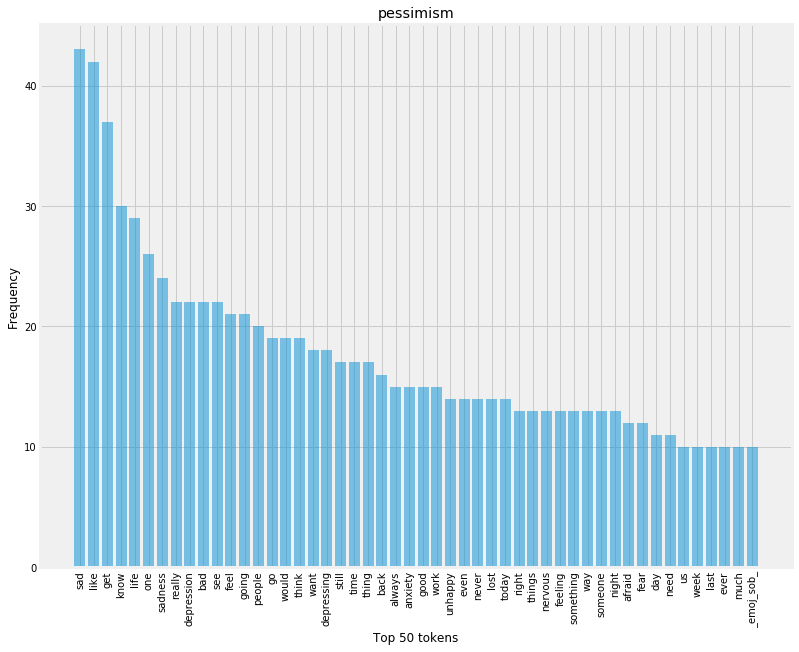

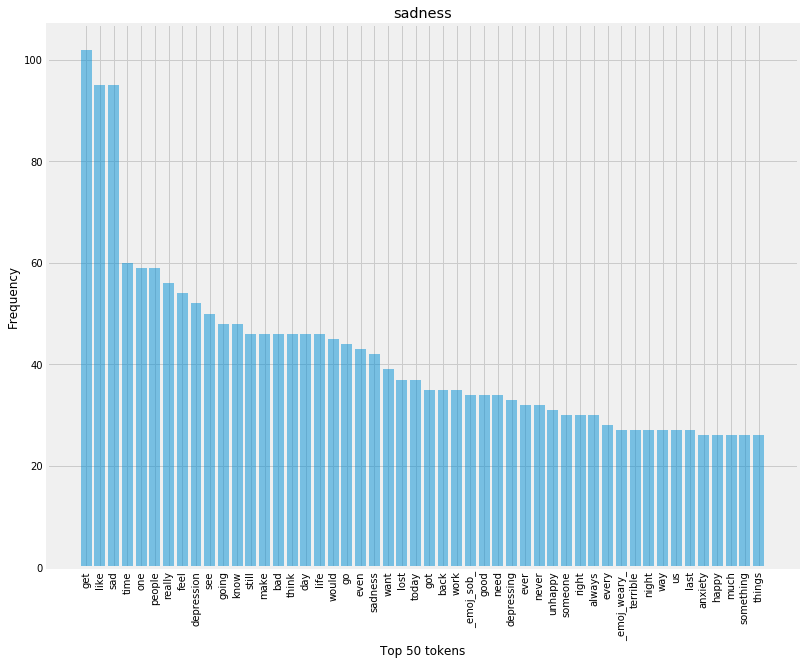

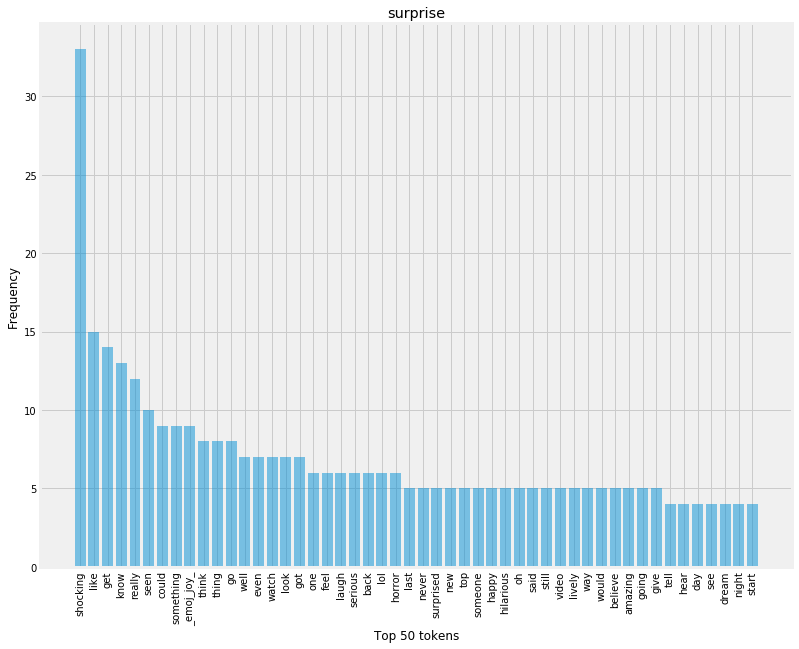

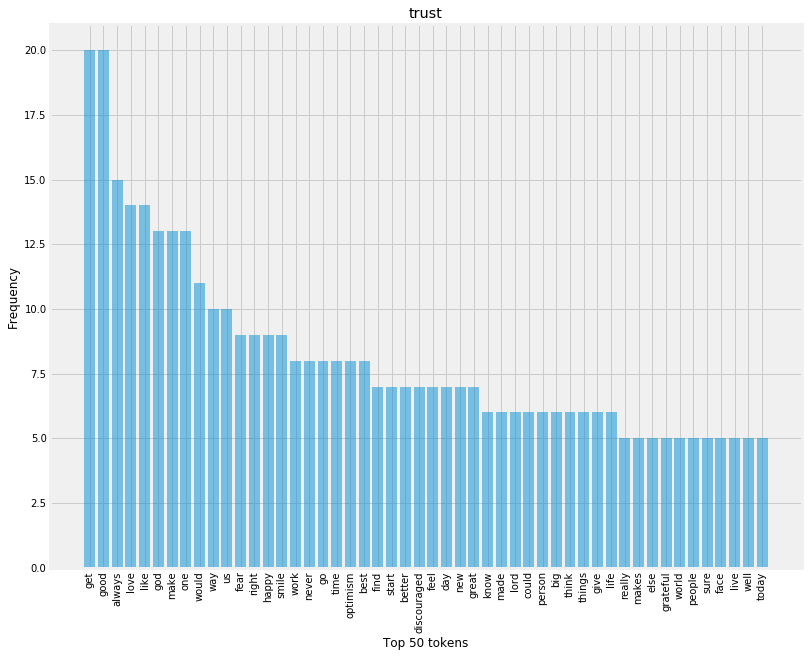

In [23]:
y_pos = np.arange(50)
for emotion in emotions:
    plt.figure(figsize=(12,10))
    plt.bar(y_pos, term_freq_df.sort_values(by=emotion, ascending=False)[emotion][:50], align='center', alpha=0.5)
    plt.xticks(y_pos, term_freq_df.sort_values(by=emotion, ascending=False)[emotion][:50].index,rotation='vertical')
    plt.ylabel('Frequency')
    plt.xlabel('Top 50 tokens')
    plt.title(emotion)
    plt.savefig(emotion+'.png')

#### B. Word associations in lexicons

In [43]:
#Import lexicons - NRC emotion and NRC hashtag emotion
lex = pd.read_csv('lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['token', 'emotion', 'value'])
lex_twitter = pd.read_csv('lexicon/NRC-Hashtag-Emotion-Lexicon-v0.2.txt', sep='\t', header=None, names=['emotion', 'token', 'value'])

In [44]:
 lex.head()

,token,emotion,value
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [45]:
lex_twitter.head()

,emotion,token,value
0,anticipation,crae,2.237478
1,anticipation,#mycolour,2.237478
2,anticipation,#vigilance,2.237478
3,anticipation,#vigilant,2.237478
4,anticipation,#hmmmmm,2.237478


In [46]:
lex = lex[lex.value != 0]
lex.head()

,token,emotion,value
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1


In [47]:
lex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13901 entries, 19 to 141755
Data columns (total 3 columns):
token      13901 non-null object
emotion    13901 non-null object
value      13901 non-null int64
dtypes: int64(1), object(2)
memory usage: 434.4+ KB


In [48]:
lex.emotion.unique()

array(['trust', 'fear', 'negative', 'sadness', 'anger', 'surprise',
       'positive', 'disgust', 'joy', 'anticipation'], dtype=object)

In [49]:
unique_tokens['anticipation'] = unique_tokens.pop('antic')
unique_tokens['sadness'] = unique_tokens.pop('sad')

In [50]:
#Find tokens for each emotion in NRC lexicon
lex_matches = {
    'anger': [],
    'trust': [],
    'fear': [],
    'sadness': [],
    'surprise': [],
    'disgust': [],
    'joy': [],
    'anticipation': []
}
lex_non_match = {
    'anger': [],
    'trust': [],
    'fear': [],
    'sadness': [],
    'surprise': [],
    'disgust': [],
    'joy': [],
    'anticipation': []
}
for item in ['trust', 'fear', 'sadness', 'anger', 'surprise', 'disgust', 'joy', 'anticipation']:
    lex_tokens = (lex[lex.emotion == item].token).tolist()
    tweet_tokens = unique_tokens[item]
    for text in tweet_tokens:
        if text in lex_tokens:
            lex_matches[item].append(text)
        else:
            lex_non_match[item].append(text)

In [51]:
unique_t = [len(unique_tokens[item]) for item in ['trust', 'fear', 'sadness', 'anger', 'surprise', 'disgust', 'joy', 'anticipation']]
match_t = [len(lex_matches[item]) for item in ['trust', 'fear', 'sadness', 'anger', 'surprise', 'disgust', 'joy', 'anticipation']]

In [52]:
with open('lexicon/lex_matched_tokens_summary.pickle', 'wb') as file3:
    pickle.dump(lex_matches, file3)

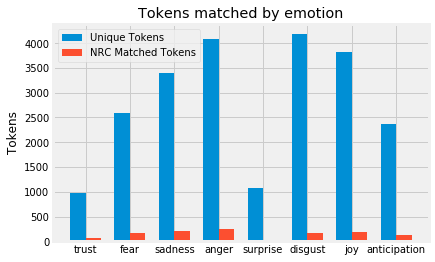

In [53]:
N = 8
ind = np.arange(N)
width = 0.35

plt.bar(ind, unique_t, width, label='Unique Tokens')
plt.bar(ind + width, match_t, width,
    label='NRC Matched Tokens')

plt.ylabel('Tokens')
plt.title('Tokens matched by emotion')

plt.xticks(ind + width / 2, ('trust', 'fear', 'sadness', 'anger', 'surprise', 'disgust', 'joy', 'anticipation'))
plt.legend(loc='best')
plt.show()

In [54]:
pos_match = {}
neg_match = {}
pos_lex = (lex[lex.emotion == 'positive'].token).tolist()
neg_lex = (lex[lex.emotion == 'negative'].token).tolist()
for key in unique_tokens:
    token_list = unique_tokens[key]
    pos_match[key] = []
    neg_match[key] = []
    for token in token_list:
        if token in pos_lex:
            pos_match[key].append(token)
        if token in neg_lex:
            neg_match[key].append(token)

In [55]:
len(pos_match['anger'])

314

In [56]:
len(neg_match['anger'])

484

In [57]:
pos = [len(pos_match[item]) for item in emotions]
neg = [len(neg_match[item]) for item in emotions]

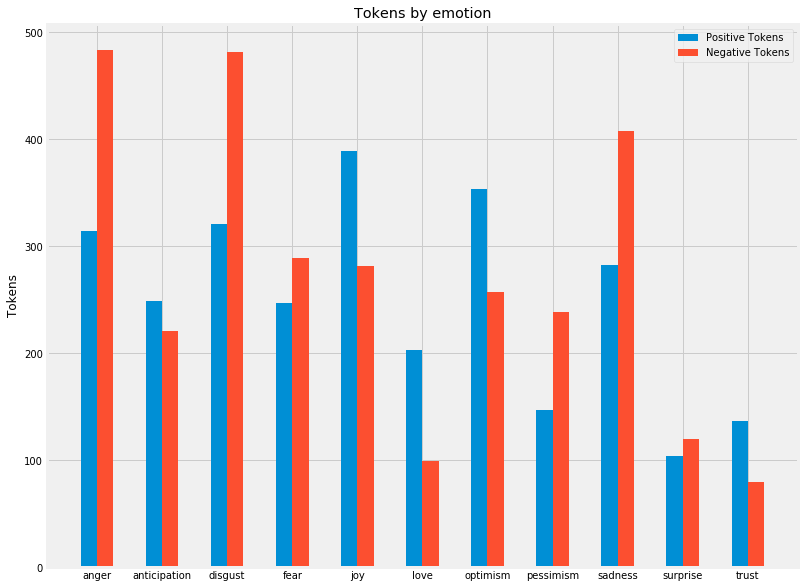

<Figure size 432x288 with 0 Axes>

In [58]:
N = 11
ind = np.arange(N)
width = 0.25
plt.figure(figsize=(12,10))
plt.bar(ind, pos, width, label='Positive Tokens')
plt.bar(ind + width, neg, width,
    label='Negative Tokens')

plt.ylabel('Tokens')
plt.title('Tokens by emotion')

plt.xticks(ind + width / 2, emotions)
plt.legend(loc='best')
plt.show()
plt.savefig('matched_positive_negative.png')

#### C. POS tags of matched tokens

In [59]:
import nltk
all_lex_tokens = lex.token.tolist()
unique_token_list = []
for key in unique_tokens:
    unique_token_list.extend(unique_tokens[key])

In [60]:
len(unique_token_list)

28936

In [61]:
unique_token_list = set(unique_token_list)

In [62]:
len(all_lex_tokens)

13901

In [63]:
pos_tags = []
for token in unique_token_list:
    if token in all_lex_tokens:
        tag = nltk.tag.pos_tag([token])
        pos_tags.append(tag)
len(pos_tags)

1497

In [107]:
type(pos_tags[9][0][1])

str

In [64]:
tags = []
for item in pos_tags:
    tags.append(item[0][1])
len(tags)

1497

In [65]:
from collections import Counter
d = Counter(tags)

n, m = d.keys(), d.values()
print(n,m)

dict_keys(['JJ', 'NN', 'VBG', 'NNS', 'RB', 'VBN', 'VB', 'VBD', 'JJS', 'JJR']) dict_values([165, 1090, 102, 29, 40, 53, 11, 3, 1, 3])


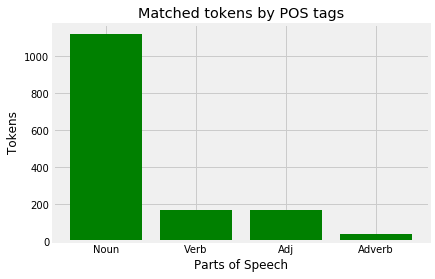

In [66]:
x = ['Noun', 'Verb', 'Adj', 'Adverb']
values = [1119, 169, 169, 40]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, values, color='green')
plt.xlabel("Parts of Speech")
plt.ylabel("Tokens")
plt.title("Matched tokens by POS tags")

plt.xticks(x_pos, x)

plt.show()

## Similarity of emotions